In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import numpy as np
from random import randint
import math

from ortc.utils import *
from ortc.glop_v2 import glop_v2
from ortc.ortc_v2 import ortc_v2
from ortc.ortc_v1 import ortc_v1
from otc.exactOTC import exact_otc
from ortc.entropicORTC import entropic_ortc

from experiment.isomorphism import *

In [5]:
A = random_lollipop(7,15)

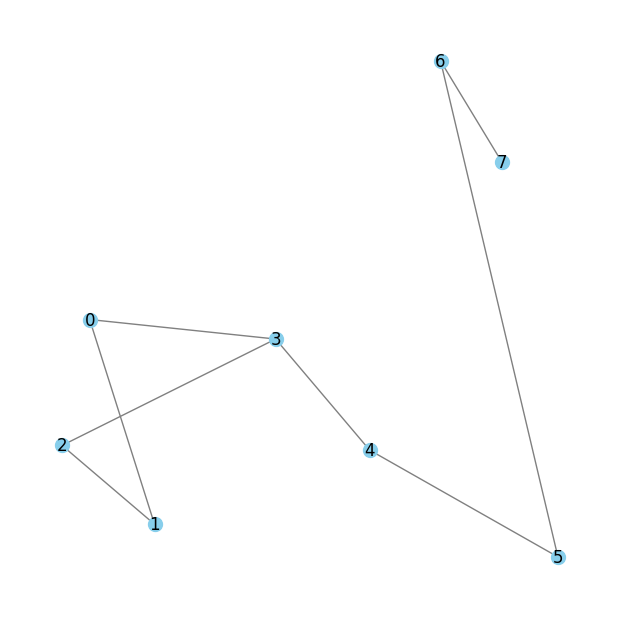

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(A)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, font_size=12, edge_color='gray')
plt.show()

In [2]:
A = random_lollipop(3,5)

In [5]:
isomorphism_experiment("random_lollipop", 1, params=(7,15))

0


(1.0, 1.0, 1.0, 1.0, 1)

In [2]:
isomorphism_experiment("random_tree", 100, params=(7,15))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(1.0, 1.0, 1.0, 0.99, 100)

In [2]:
A11 = random_lollipop_fill(7, 15)

In [5]:
A11 = random_tree(7, 15)

In [3]:
# A1 = A11 / np.sum(A11)
A1 = A11.copy()
n = A1.shape[0]

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

# Get transition matrices
P1 = adj_to_trans(A1)
P2 = adj_to_trans(A2)

# Get cost function
c = get_degree_cost(A1, A2)

# Run algorithm
_, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
ortc_alignment = np.sum(ortc_weight, axis=(2, 3))
_, otc_cost, _, otc_alignment = exact_otc(P1, P2, c)

# Get alignment
idx_ortc = np.argmax(ortc_alignment, axis=1)
idx_otc = np.argmax(otc_alignment, axis=1)

#return math.isclose(ortc_cost, 0, abs_tol=1e-9), math.isclose(otc_cost, 0, abs_tol=1e-9), check_isomorphism(idx_ortc, A1, A2), check_isomorphism(idx_otc, A1, A2)

In [4]:
math.isclose(ortc_cost, 0, abs_tol=1e-9), math.isclose(otc_cost, 0, abs_tol=1e-9), check_isomorphism(idx_ortc, A1, A2), check_isomorphism(idx_otc, A1, A2)

(True, True, True, False)

In [21]:
_, otc_cost, _, otc_alignment = exact_otc(P1, P2, c)

In [22]:
otc_cost

0.0018835852145075282

In [27]:
otc_cost

1.273303602826675

In [28]:
A11

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [29]:
# A1 = A11 / np.sum(A11)
A1 = A11.copy()
n = A1.shape[0]

# Random permutation
# perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

# Get transition matrices
P1 = adj_to_trans(A1)
P2 = adj_to_trans(A2)

# Get cost function
c = get_degree_cost(A1, A2)

# Run algorithm
# _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
# ortc_alignment = np.sum(ortc_weight, axis=(2, 3))
_, otc_cost, _, otc_alignment = exact_otc(P1, P2, c)

# Get alignment
# idx_ortc = np.argmax(ortc_alignment, axis=1)
idx_otc = np.argmax(otc_alignment, axis=1)

#return math.isclose(ortc_cost, 0, abs_tol=1e-9), math.isclose(otc_cost, 0, abs_tol=1e-9), check_isomorphism(idx_ortc, A1, A2), check_isomorphism(idx_otc, A1, A2)

In [30]:
otc_cost

1.273303602826675

In [32]:
idx_ortc

array([11,  7, 12,  2, 10,  1,  4,  9, 13,  5,  8,  3,  6,  0])

In [31]:
idx_otc

array([ 2,  4,  5,  3,  8,  6,  7, 11,  1, 12, 10,  0,  8,  3])

In [89]:
math.isclose(ortc_cost, 0, abs_tol=1e-9), math.isclose(otc_cost, 0, abs_tol=1e-9), check_isomorphism2(idx_ortc, A1, A2), check_isomorphism2(idx_otc, A1, A2)

(True, True, True, True)

In [87]:
def check_isomorphism2(idx, A1, A2):
    if A1.shape[0] != A2.shape[0]:
        return False

    if not np.array_equal(np.unique(idx), np.arange(A1.shape[0])):
        return False

    row, col = np.where(np.tril(A1) != 0)
    n = len(row)
    for i in range(n):
        if not math.isclose(A2[idx[row[i]], idx[col[i]]], A1[row[i], col[i]], abs_tol=1e-9):
            return False

    row, col = np.where(np.tril(A2) != 0)
    inv_idx = np.zeros(A1.shape[0], dtype=int)
    for i in range(A1.shape[0]):
        inv_idx[i] = np.where(idx == i)[0][0]
    n = len(row)
    for i in range(n):
        if not math.isclose(A1[inv_idx[row[i]], inv_idx[col[i]]], A2[row[i], col[i]], abs_tol=1e-9):
            return False

    return True

In [70]:
idx_ortc

array([ 2,  9,  0,  8, 11, 10,  3,  6, 12,  5,  1, 15,  7, 14, 13,  4])

In [71]:
n = A11.shape[0]

# Random permutation
# perm = np.random.permutation(n)
A21 = A11[np.ix_(perm, perm)]

# Get transition matrices
P11 = adj_to_trans(A11)
P21 = adj_to_trans(A21)

# Get cost function
c = get_degree_cost(A11, A21)

# Run algorithm
_, ortc_cost, ortc_weight = glop_v2(A11, A21, c, vertex=True)
ortc_alignment = np.sum(ortc_weight, axis=(2, 3))
_, otc_cost, _, otc_alignment = exact_otc(P11, P21, c)

# Get alignment
idx_ortc2 = np.argmax(ortc_alignment, axis=1)
idx_otc2 = np.argmax(otc_alignment, axis=1)

In [72]:
math.isclose(ortc_cost, 0, abs_tol=1e-9), math.isclose(otc_cost, 0, abs_tol=1e-9), check_isomorphism(idx_ortc2, A11, A21), check_isomorphism(idx_otc2, A11, A21)

(True, True, True, True)

In [76]:
perm

array([ 2, 10,  0,  6, 15,  9,  7, 12,  3,  1,  5,  4,  8, 14, 13, 11])

In [73]:
idx_ortc

array([ 2,  9,  0,  8, 11, 10,  3,  6, 12,  5,  1, 15,  7, 14, 13,  4])

In [80]:
A2[idx[row[0]], idx[col[0]]]

0.020833333333333332

In [81]:
A1[row[0], col[0]]

0.020833333333333336

In [84]:
unique(A1)

NameError: name 'unique' is not defined

In [79]:
idx = idx_ortc
row, col = np.where(np.tril(A1) != 0)
n = len(row)
for i in range(n):
    if A2[idx[row[i]], idx[col[i]]] != A1[row[i], col[i]]:
        print("ERROR")

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


In [75]:
row, col = np.where(np.tril(A1) != 0)
n = len(row)
for i in range(n):
    if A2[idx[row[i]], idx[col[i]]] != A1[row[i], col[i]]:
        return False

row, col = np.where(np.tril(A2) != 0)
inv_idx = np.zeros(A1.shape[0], dtype=int)
for i in range(A1.shape[0]):
    inv_idx[i] = np.where(idx == i)[0][0]
n = len(row)
for i in range(n):
    if A1[inv_idx[row[i]], inv_idx[col[i]]] != A2[row[i], col[i]]:
        return False

return True

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
A2 = A1[np.ix_(perm, perm)]

# Get transition matrices
P1 = adj_to_trans(A1)
P2 = adj_to_trans(A2)

# Get cost function
c = get_degree_cost(A1, A2)

# Run algorithm
_, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
ortc_alignment = np.sum(ortc_weight, axis=(2, 3))
_, otc_cost, _, otc_alignment = exact_otc(P1, P2, c)

# Get alignment
idx_ortc = np.argmax(ortc_alignment, axis=1)
idx_otc = np.argmax(otc_alignment, axis=1)

In [14]:
otc_cost

1.6300503115992664e-14

In [18]:
n = 7
A = np.random.randint(0, 2, (n, n)).astype(np.float64)  # Generate random integers between 0 and 2
A1 = np.triu(A)+ np.triu(A, 1).T  # Construct the desired matrix

# Check success
# ortc_success, otc_success = permute_isomorphism(A)

n = A1.shape[0]

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

# Get transition matrices
P1 = adj_to_trans(A1)
P2 = adj_to_trans(A2)

# Get cost function
c = get_degree_cost(A1, A2)

# Run algorithm
_, _, ortc_weight = glop_v2(A1, A2, c, vertex=True)
# ortc_alignment = np.sum(ortc_weight, axis=(2, 3))

In [19]:
n = 5 + randint(1, 10)
p = 2 / 3

# Construct adjacency matrices
A1 = stochastic_block_model([n], np.array([[p]]))

# Check success
ortc_success, otc_success = permute_isomorphism(A1)

In [31]:
A1 = stochastic_block_model([n], np.array([[p]]))


In [32]:
A1[0][1] = 2
A1[1][0] = 2
ortc_success, otc_success = permute_isomorphism(A1)

In [33]:
ortc_success

True

In [29]:
n = 5 + randint(1, 10)
p = 2 / 3

# Construct adjacency matrices
A1 = stochastic_block_model([n], np.array([[p]]))

# Check success
ortc_success, otc_success = permute_isomorphism(A1)

In [30]:
ortc_success, otc_success

(True, True)

In [22]:
n = 5 + randint(1, 10)
p = 2 / 3

# Construct adjacency matrices
A1 = stochastic_block_model([n], np.array([[p]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

# Get transition matrices
P1 = adj_to_trans(A1)
P2 = adj_to_trans(A2)

# Get cost function
c = get_degree_cost(A1, A2)

# Run algorithm
_, _, ortc_weight = glop_v2(A1, A2, c, vertex=True)
ortc_alignment = np.sum(ortc_weight, axis=(2, 3))
_, _, _, otc_alignment = exact_otc(P1, P2, c)

# Get alignment
idx_ortc = np.argmax(ortc_alignment, axis=1)
idx_otc = np.argmax(otc_alignment, axis=1)

In [26]:
idx_ortc, idx_otc

(array([ 6, 10,  0,  9,  8,  7,  5,  2,  1, 12,  4, 11,  3]),
 array([ 6, 10,  0,  9,  8,  7,  5,  2,  1, 12,  4, 11,  3]))

In [24]:
perm

array([ 2,  8,  7, 12, 10,  6,  0,  5,  4,  3,  1, 11,  9])

In [21]:
otc_alignment

array([[ 8.33333333e-02,  5.55555556e-02,  0.00000000e+00,
         1.59084930e-19, -1.49881733e-20, -4.09752839e-37,
         1.78536314e-37],
       [ 5.55555556e-02,  8.33333333e-02,  5.80957450e-21,
         1.55830868e-21,  1.47221384e-20,  0.00000000e+00,
         9.45000916e-38],
       [ 1.27840679e-21,  1.99059589e-20,  1.38888889e-01,
         5.56699444e-23,  1.47486085e-21,  1.35907465e-21,
         2.00134765e-20],
       [ 1.09525971e-21,  2.77653798e-20,  6.49559475e-22,
         1.11111111e-01,  1.65885315e-22,  0.00000000e+00,
         0.00000000e+00],
       [ 5.20124302e-20, -3.52143904e-23,  7.19734507e-21,
         2.14141131e-21,  1.38888889e-01,  2.71814930e-22,
         2.77539926e-22],
       [ 0.00000000e+00,  8.43895026e-40,  1.63833548e-21,
         0.00000000e+00,  1.50324515e-21,  1.66666667e-01,
        -5.53112572e-21],
       [ 5.64820587e-37,  0.00000000e+00,  8.42403137e-24,
         0.00000000e+00,  4.95547680e-21,  3.57387098e-20,
         1.6666666

In [10]:
def func(n, p):
    A1 = stochastic_block_model([n], np.array([[p]]))
    return A1

def func2(params):
    return func(*params)

In [11]:
func(10, 2/3)

array([[0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 1., 1., 1., 0.]])

In [12]:
func2((10, 2/3))

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 0., 1., 0.]])

In [8]:
import numpy as np

n = 5  # Set the value of n
A1 = np.random.randint(0, 3, (n, n))  # Generate random integers between 0 and 2
A1 = np.triu(A1)+ np.triu(A1, 1).T  # Construct the desired matrix
A1

array([[2, 2, 0, 2, 1],
       [2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [2, 0, 0, 1, 1],
       [1, 0, 1, 1, 0]])

In [ ]:
def random_lollipop(n, m):
    A1 = np.zeros((n+m, n+m))
    A1[:n, :n] = np.random.randint(0, 3, (n, n))
    A1[:n, n:] = np.random.randint(0, 3, (n, m))
    A1[n:, :n] = A1[:n, n:].T
    return A1

In [11]:
def random_lollipop():
    n1 = np.random.randint(7, 15)  # number of nodes in the candy part
    n2 = np.random.randint(7, 15)  # number of nodes in the stick part
    n = n1 + n2  # total number of nodes
    p = 0.5  # probability for the stochastic block model in the candy part

    # Construct adjacency matrix for candy part
    A1 = stochastic_block_model([n1], np.array([[p]]))
    A1 = np.triu(A1, 1)  # Get upper triangular part excluding diagonal

    # Ensure each node is connected to the next node, if not already connected
    for row in range(n1 - 1):
        A1[row, row + 1] = 1
    A1[0, n1 - 1] = 1
    
    A1 = A1 + A1.T  

    # Construct adjacency matrix for stick part
    A2 = np.zeros((n2, n2))
    for row in range(n2 - 1):
        A2[row, row + 1] = 1
    A2 = A2 + A2.T  # Make the stick part matrix symmetric

    # Construct the full adjacency matrix
    A = np.zeros((n, n))
    A[:n1, :n1] = A1  # Add candy part to the full matrix
    A[n1:, n1:] = A2  # Add stick part to the full matrix

    # Connect the last node of the candy part to the first node of the stick part
    A[n1 - 1, n1] = 1
    A[n1, n1 - 1] = 1

    return A

In [20]:
A = random_lollipop()

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(A)

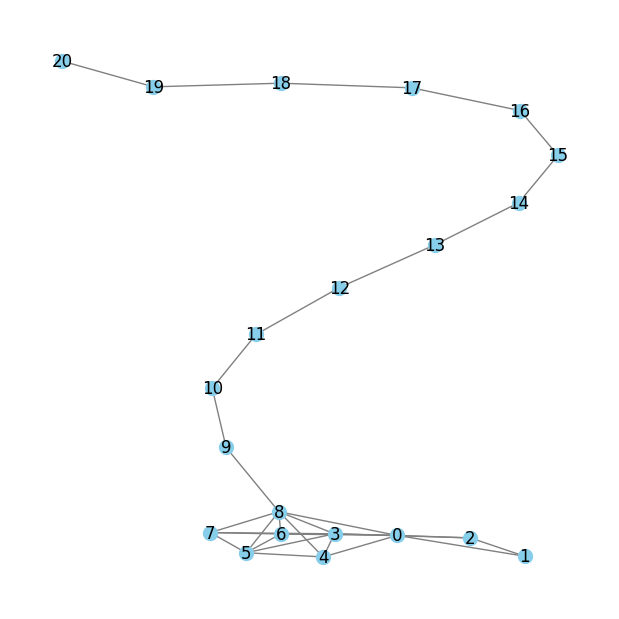

In [22]:
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, font_size=12, edge_color='gray')
plt.show()

In [2]:
def random_weighted_adjacency_matrix(a, b):
    n = randint(a, b)
    A = np.random.randint(0, 3, (n, n))  # Generate random integers between 0 and 2
    return np.triu(A)+ np.triu(A, 1).T  # Construct the desired matrix

In [8]:
import sys
import os
import argparse
sys.path.append(os.path.abspath('../'))

import numpy as np
from random import randint
import random
import networkx as nx
A = random_weighted_adjacency_matrix(6, 15)

In [10]:
from ortc.utils import *
is_connected(A)


True

In [7]:
for i in range(100):
    print(i)
    A1 = random_erdos_renyi(6, 15, 1/3)
    A2 = random_erdos_renyi(6, 15, 1/3)
    if is_connected(A1) and is_connected(A2):
        c = get_degree_cost(A1, A2)

        # Run algorithm
        _, ortc_cost, _ = glop_v2(A1, A2, c, vertex=True)
    if ortc_cost < 0.00001:
        print(i, ": ", ortc_cost)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [89]:
def independent_weight_couplings(A1, A2):
    dx = A1.shape[0]
    dy = A2.shape[0]
    w = np.zeros((dx,dy,dx,dy))
    for i in range(dx):
        for j in range(dy):
            for k in range(dx):
                w[i,j,k,:] = A1[i,k]*A2[j,:]
    return w

In [91]:
for i in range(10):
    # A1 = random_tree(7, 15)
    # A1 = random_lollipop_fill(7, 15)
    A1 = random_erdos_renyi(6, 15, 1/3)
    n = A1.shape[0]
    
    if is_connected(A1):
        A1 /= np.sum(A1)
        # Random permutation
        perm = np.random.permutation(n)
        A2 = A1[np.ix_(perm, perm)]

        
        # Get cost function
        c = get_degree_cost(A1, A2)

        # Run algorithm
        _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
        _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
        w_indep = independent_weight_couplings(A1,A2)
        d = np.sum(w_indep, axis=(2, 3))
        cost_indep = np.sum(d * c)
        print(ortc_cost, entropic_cost, cost_indep)

2.68783896141541e-16 0.001090506180427634 0.0010934780821966758
5.134581725672359e-17 0.0032347078995099664 0.003255555555555555
1.578302683277825e-16 0.0016514577805731203 0.0016584420463083122
4.875706345375919e-16 0.00098699079812595 0.000988291782191237
1.4335042261586283e-18 0.004865895241249943 0.004951847551396764
1.3721880543879292e-15 0.0070157393703722416 0.00720178158786413
1.0917954752480829e-15 0.001504405075150202 0.0015098689224203633
0.0 0.004196661914869808 0.004243827160493828
0.0 0.010535978815887533 0.011188271604938274


In [111]:
for i in range(10):
    # A1 = random_tree(7, 15)
    # A1 = random_lollipop_fill(7, 15)
    A1 = random_erdos_renyi(6, 15, 1/3)
    n = A1.shape[0]
    
    if is_connected(A1):
        # A1 /= np.sum(A1)
        # Random permutation
        perm = np.random.permutation(n)
        A2 = A1[np.ix_(perm, perm)]

        
        # Get cost function
        c = get_degree_cost(A1, A2)

        # Run algorithm
        _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
        _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
        w_indep = independent_weight_couplings(A1,A2)
        d = np.sum(w_indep, axis=(2, 3))
        cost_indep = np.sum(d * c)
        print(ortc_cost, entropic_cost, cost_indep)

2.5558818341807507e-15 0.12324503244355035 1.3200000000000003


/Users/bongsooyi/ORTC/ortc/entropicORTC.py:80: RuntimeWarning: overflow encountered in divide
  H[i, j, k, l] = np.sqrt((F[k, l, i] * G[k, l, j]) / (F[i, j, k] * G[i, j, l]))


8.170939690734318e-14 nan 4.013671875
4.660988313949338e-13 nan 3.9682539682539684
3.0745551615356122e-12 nan 9.396193771626297
5.428545556131711e-13 nan 2.8468809073724004
4.031916215625532e-14 0.3767946303060626 1.21875
3.461742911687927e-15 0.032484223639380735 1.7777777777777777
9.388539649155334e-13 nan 3.611111111111111
3.928437889051183e-12 nan 3.529843893480258
0.0 1.0925941727259014e-17 1.9200000000000006


In [112]:
for i in range(10):
    A1 = random_tree(7, 15)
    # A1 = random_lollipop_fill(7, 15)
    # A1 = random_erdos_renyi(6, 15, 1/3)
    n = A1.shape[0]
    
    if is_connected(A1):
        # A1 /= np.sum(A1)
        # Random permutation
        perm = np.random.permutation(n)
        A2 = A1[np.ix_(perm, perm)]

        
        # Get cost function
        c = get_degree_cost(A1, A2)
        
        A1 /= np.sum(A1)
        A2 /= np.sum(A2)

        # Run algorithm
        _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
        _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
        w_indep = independent_weight_couplings(A1,A2)
        d = np.sum(w_indep, axis=(2, 3))
        cost_indep = np.sum(d * c)
        print(ortc_cost, entropic_cost, cost_indep)

/Users/bongsooyi/ORTC/ortc/entropicORTC.py:80: RuntimeWarning: overflow encountered in divide
  H[i, j, k, l] = np.sqrt((F[k, l, i] * G[k, l, j]) / (F[i, j, k] * G[i, j, l]))
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:87: RuntimeWarning: invalid value encountered in multiply
  w = F[:, :, :, np.newaxis] * C * G[:, :, np.newaxis, :] * H * K


1.7615375098918057e-16 nan 5.46875
1.8264732981620062e-16 0.008254053483293278 1.9644970414201186
0.0 0.1451466077997935 0.9800000000000002
2.734388489094099e-15 nan 2.8047337278106514
3.670971204409011e-17 nan 7.13265306122449


/Users/bongsooyi/ORTC/ortc/entropicORTC.py:80: RuntimeWarning: overflow encountered in multiply
  H[i, j, k, l] = np.sqrt((F[k, l, i] * G[k, l, j]) / (F[i, j, k] * G[i, j, l]))


1.0238864568230548e-16 0.05566824791419068 1.7396449704142012
6.430041684287366e-16 0.003499723823883111 2.2200000000000006
6.184357071377492e-16 0.10222739360013584 3.727810650887574
2.3997338831790347e-16 0.053005503810284765 2.03305785123967
1.9092801748379476e-15 nan 3.881656804733727


In [103]:
for i in range(10):
    A1 = random_tree(7, 15)
    # A1 = random_lollipop_fill(7, 15)
    # A1 = random_erdos_renyi(6, 15, 1/3)
    n = A1.shape[0]
    
    if is_connected(A1):
        # A1 /= np.sum(A1)
        # Random permutation
        perm = np.random.permutation(n)
        A2 = A1[np.ix_(perm, perm)]

        # Get cost function
        c = get_degree_cost(A1, A2)

        # Run algorithm
        _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
        _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
        w_indep = independent_weight_couplings(A1,A2)
        d = np.sum(w_indep, axis=(2, 3))
        cost_indep = np.sum(d * c)
        print(ortc_cost, entropic_cost, cost_indep)

9.148867601891757e-17 0.12502312373088256 0.9800000000000002
6.909409262121572e-17 0.4355060585419963 1.4081632653061225
5.053818105169765e-17 0.15172094798938573 1.0864197530864197
2.4190953150682403e-16 0.0830711381616979 1.8367346938775508
0.0 0.08071242210027375 2.1111111111111116
2.611160227189957e-15 0.2724767403652942 2.6272189349112427
4.769256761121415e-16 0.05569615639091709 1.21875
3.5601587512045135e-17 0.273396290749489 1.375
1.2722578011440442e-15 0.5125560623461607 1.8367346938775508
2.0559685641206608e-17 0.051552884044858784 1.0


In [104]:
A1 = random_tree(7, 15)
#A1 = random_lollipop_fill(7, 15)
#A1 = random_erdos_renyi(6, 15, 1/3)
n = A1.shape[0]

if is_connected(A1):
    # Random permutation
    perm = np.random.permutation(n)
    A2 = A1[np.ix_(perm, perm)]
    
    # Get cost function
    c = get_degree_cost(A1, A2)

    # Run algorithm
    _, ortc_cost, ortc_weight = glop_v2(A1, A2, c, vertex=True)
    _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
    w_indep = independent_weight_couplings(A1,A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    print(ortc_cost, entropic_cost, cost_indep)

0.0 0.0078014583335680975 1.0864197530864197


In [105]:
_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.1, 10000, 1e-10)
print(entropic_cost)

0.0078014583335680975


In [106]:
_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.05, 10000, 1e-10)
print(entropic_cost)

0.0011921294052198096


In [107]:
_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.03, 10000, 1e-10)
print(entropic_cost)

0.00021055671857564114


In [110]:
_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.02, 10000, 1e-10)
print(entropic_cost)

3.7234580248856785e-05


In [109]:
_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.01, 10000, 1e-10)
print(entropic_cost)

nan


/Users/bongsooyi/ORTC/ortc/entropicORTC.py:61: RuntimeWarning: divide by zero encountered in divide
  F = (d[:, :, np.newaxis] * A1[:, np.newaxis, :] / d1[:, np.newaxis, np.newaxis]) / t
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:61: RuntimeWarning: invalid value encountered in divide
  F = (d[:, :, np.newaxis] * A1[:, np.newaxis, :] / d1[:, np.newaxis, np.newaxis]) / t
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:66: RuntimeWarning: invalid value encountered in multiply
  t = np.sum(C * F[:, :, :, np.newaxis] * H * K, axis=2)
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:69: RuntimeWarning: divide by zero encountered in divide
  G = (d[:, :, np.newaxis] * A2[np.newaxis, :, :] / d2[np.newaxis, :, np.newaxis]) / t
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:69: RuntimeWarning: invalid value encountered in divide
  G = (d[:, :, np.newaxis] * A2[np.newaxis, :, :] / d2[np.newaxis, :, np.newaxis]) / t
/Users/bongsooyi/ORTC/ortc/entropicORTC.py:83: RuntimeWarning: invalid value encountered in mult

In [79]:
A1 = random_tree(7, 15)
#A1 = random_lollipop_fill(7, 15)
A1 = random_erdos_renyi(6, 15, 1/3)
n = A1.shape[0]
A2 = random_tree(7, 15)
A2 = random_erdos_renyi(6, 15, 1/3)
A1 /= np.sum(A1)
A2 /= np.sum(A2)
c = get_degree_cost(A1, A2)
entropic_ortc(A1, A2, c, 0.01, 10000, 1e-8)

(array([[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         ...,
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, n

In [80]:
A1

array([[0.        , 0.        , 0.        , 0.02380952, 0.02380952,
        0.        , 0.        , 0.        , 0.02380952, 0.        ,
        0.        , 0.02380952],
       [0.        , 0.        , 0.02380952, 0.        , 0.02380952,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.02380952, 0.        , 0.02380952, 0.        ,
        0.        , 0.02380952, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.02380952, 0.        , 0.02380952, 0.        , 0.02380952,
        0.02380952, 0.        , 0.02380952, 0.        , 0.02380952,
        0.        , 0.        ],
       [0.02380952, 0.02380952, 0.        , 0.02380952, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02380952],
       [0.        , 0.        , 0.        , 0.02380952, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02380952,
        0.02380952,

In [81]:
A2

array([[0.        , 0.04545455, 0.        , 0.        , 0.04545455,
        0.04545455, 0.04545455, 0.        , 0.        ],
       [0.04545455, 0.        , 0.        , 0.        , 0.        ,
        0.04545455, 0.        , 0.        , 0.04545455],
       [0.        , 0.        , 0.        , 0.        , 0.04545455,
        0.04545455, 0.        , 0.        , 0.04545455],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04545455],
       [0.04545455, 0.        , 0.04545455, 0.        , 0.        ,
        0.04545455, 0.        , 0.        , 0.        ],
       [0.04545455, 0.04545455, 0.04545455, 0.        , 0.04545455,
        0.        , 0.        , 0.        , 0.        ],
       [0.04545455, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [82]:
eps, niter, tol = 0.001, 10000, 1e-8

dx, _ = A1.shape
dy, _ = A2.shape

# d1: dx
# d2: dy
d1 = np.sum(A1, axis=1)
d2 = np.sum(A2, axis=1)

# Init
# C: dx * dy * dx * dy
C = np.exp(-(c[:, :, np.newaxis, np.newaxis] + c[np.newaxis, np.newaxis, :, :]) / eps)

# F: dx * dy * dx
F = np.tile(A1[:, np.newaxis, :], (1, dy, 1))

# G: dx * dy * dy
G = np.tile(A2, (dx, 1, 1))

# H: dx * dy * dx * dy
H = np.ones((dx, dy, dx, dy))

# K: scalar
K = np.sum(F[:, :, :, np.newaxis] * C * G[:, :, np.newaxis, :] * H)
K = 1 / K

# w: dx * dx * dx * dy    
w = C * F[:, :, :, np.newaxis] * G[:, :, np.newaxis, :] * H * K
        
w_old = np.ones((dx,dy,dx,dy))
num_iter = 0

#storing iterates and cost values
iter_history = []
cost_history = []

iter_history.append(num_iter+1)

In [68]:
w_old = np.copy(w)

# 2: update F
# d: dx * dy
d = np.sum(w, axis=(2, 3))
# t: sum((dx * dy * dx * dy ) * (dx * 1 * dx * dy) * (dx * dy * dx * dy) = dx * dy * dx * dy, axis=3)
# t: dx * dy * dx
t = np.sum(C * G[:, :, np.newaxis, :] * H * K, axis=3)
F = (d[:, :, np.newaxis] * A1[:, np.newaxis, :] / d1[:, np.newaxis, np.newaxis]) / t

/var/folders/91/sl4wc9t14t7dxt0p21446nrr0000gn/T/ipykernel_1444/2454534728.py:9: RuntimeWarning: divide by zero encountered in divide
  F = (d[:, :, np.newaxis] * A1[:, np.newaxis, :] / d1[:, np.newaxis, np.newaxis]) / t
/var/folders/91/sl4wc9t14t7dxt0p21446nrr0000gn/T/ipykernel_1444/2454534728.py:9: RuntimeWarning: invalid value encountered in divide
  F = (d[:, :, np.newaxis] * A1[:, np.newaxis, :] / d1[:, np.newaxis, np.newaxis]) / t


In [84]:
np.exp(-(c[:, :, np.newaxis, np.newaxis] + c[np.newaxis, np.newaxis, :, :]) / eps)

array([[[[3.08290664e-07, 1.02318350e-04, 1.02318350e-04, ...,
          4.65718991e-05, 6.38706318e-08, 1.02318350e-04],
         [8.37710261e-12, 2.10935503e-07, 2.10935503e-07, ...,
          5.52644035e-04, 5.75023301e-05, 2.10935503e-07],
         [2.83286442e-09, 8.18936620e-06, 8.18936620e-06, ...,
          2.82802604e-04, 3.37825178e-06, 8.18936620e-06],
         ...,
         [3.08290664e-07, 1.02318350e-04, 1.02318350e-04, ...,
          4.65718991e-05, 6.38706318e-08, 1.02318350e-04],
         [2.83286442e-09, 8.18936620e-06, 8.18936620e-06, ...,
          2.82802604e-04, 3.37825178e-06, 8.18936620e-06],
         [1.07968629e-05, 4.11395365e-04, 4.11395365e-04, ...,
          2.46812483e-06, 3.88609166e-10, 4.11395365e-04]],

        [[1.02318350e-04, 3.39583581e-02, 3.39583581e-02, ...,
          1.54567116e-02, 2.11979746e-05, 3.39583581e-02],
         [2.78027011e-09, 7.00072210e-05, 7.00072210e-05, ...,
          1.83416602e-01, 1.90844039e-02, 7.00072210e-05],
        

In [40]:
A2

array([[0.        , 0.        , 0.04166667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04166667,
        0.        , 0.        , 0.        ],
       [0.04166667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04166667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04166667, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04166667, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [46]:
C = np.exp(-(c[:, :, np.newaxis, np.newaxis] + c[np.newaxis, np.newaxis, :, :]) / eps)
C

array([[[[1., 1., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 1., 0.],
         ...,
         [1., 1., 0., ..., 0., 0., 1.],
         [0., 0., 1., ..., 0., 1., 0.],
         [1., 1., 0., ..., 0., 0., 1.]],

        [[1., 1., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 1., 0.],
         ...,
         [1., 1., 0., ..., 0., 0., 1.],
         [0., 0., 1., ..., 0., 1., 0.],
         [1., 1., 0., ..., 0., 0., 1.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [45]:
-(c[:, :, np.newaxis, np.newaxis] + c[np.newaxis, np.newaxis, :, :]) / eps

array([[[[     -0.,      -0.,  -10000., ...,  -40000.,  -10000.,
               -0.],
         [ -90000.,  -90000.,  -40000., ...,  -10000.,  -40000.,
           -90000.],
         [ -10000.,  -10000.,      -0., ...,  -10000.,      -0.,
           -10000.],
         ...,
         [     -0.,      -0.,  -10000., ...,  -40000.,  -10000.,
               -0.],
         [ -10000.,  -10000.,      -0., ...,  -10000.,      -0.,
           -10000.],
         [     -0.,      -0.,  -10000., ...,  -40000.,  -10000.,
               -0.]],

        [[     -0.,      -0.,  -10000., ...,  -40000.,  -10000.,
               -0.],
         [ -90000.,  -90000.,  -40000., ...,  -10000.,  -40000.,
           -90000.],
         [ -10000.,  -10000.,      -0., ...,  -10000.,      -0.,
           -10000.],
         ...,
         [     -0.,      -0.,  -10000., ...,  -40000.,  -10000.,
               -0.],
         [ -10000.,  -10000.,      -0., ...,  -10000.,      -0.,
           -10000.],
         [     -0.,     